# Softmax classification

In this exercise, you will implement a softmax classifier for multi-class classification.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Loading the data

Let's now import the `digits` dataset provided by `scikit-learn`:

<https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html>

It contains 1797 small (8x8) black and white images of digits between 0 and 9. 

The two following cells load the data and visualize 16 images chosen randomly.

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

N, w, h = digits.images.shape
d = w * h # number of pixels
c = len(digits.target_names) # number of classes

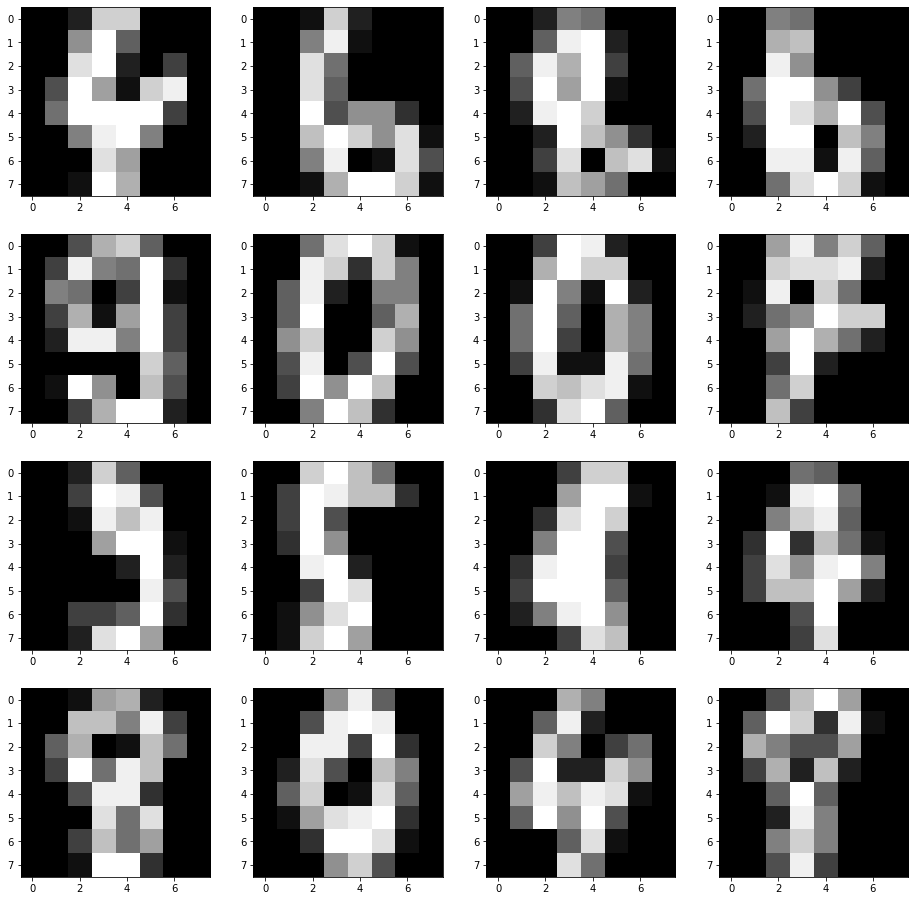

In [3]:
rng = np.random.default_rng()
indices = rng.choice(N, 16)
plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(digits.images[indices[i], :], cmap="gray")
plt.show()

Digits are indeed to be recognized, the hope being that they are linearly separable and we can apply a softmax classifier directly on the pixels. 

The only problem is that each image is a 8x8 matrix, while we want vectors for our model. Fortunately, that is very easy with `reshape`:

In [4]:
X = digits.images.reshape((N, d))

Let's know have a look at the targets, i.e. the ground truth / labels of each digit:

In [5]:
labels = digits.target
print(labels)

[0 1 2 ... 8 9 8]


Each label is an integer between 0 and 9, while our softmax classifier expects a **one-hot-encoded** vector of 10 classes, with only one non-zero element, for example for digit 3:

$$[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]$$

To do the conversion, we can once again use a built-in method of `scikit-learn`:

In [6]:
from sklearn.preprocessing import OneHotEncoder

t = OneHotEncoder().fit_transform(labels.reshape(-1, 1)).toarray()

print(t)
print(t.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]
(1797, 10)


**Q:** Split the data into a training set `X_train, t_train` and a test set `X_test, t_test` using `scikit-learn` (e.g. with a ratio 70/30).

### Softmax linear classifier

Let's remember the structure of the softmax linear classifier: the input vector $\mathbf{x}$ is transformed into a **logit score** vector $\mathbf{z}$ using a weight matrix $W$ and a bias vector $\mathbf{b}$:

$$
    \mathbf{z} = W \times \mathbf{x} + \mathbf{b}
$$

This logit score has one element per class, so the weight matrix must have a size $(c, d)$, where $c$ is the number of classes (3) and $d$ is the number of dimensions of the input space (2). The bias vector has 3 elements (one per class).

The logit score is turned into probabilities using the **softmax** operator:

$$
    y_j = P(\text{class = j}) = \frac{\exp(z_j)}{\sum_k \exp(z_k)}
$$

The following Python function allows to turn any vector $\mathbf{z}$ (numpy array) into softmax probabilities:

In [8]:
def softmax(z):
    e = np.exp(z - z.max())
    return e/np.sum(e)

**Q:** Experiment with the `softmax()` to understand its function. Pass it different numpy arrays (e.g. [-1, 0, 2]) and print or plot the corresponding probabilities.  

The loss function to use is the **cross-entropy** or **negative log-likelihood**, defined for a single example as:

$$
    \mathcal{l}(W, \mathbf{b}) =   - \mathbf{t} \cdot \log \mathbf{y} = - \log y_j 
$$

where $\mathbf{t}$ is a one-hot encoding of the class of the example and $j$ is the index of the corresponding class.

After doing the derivations, we obtain the following learning rules for $W$ and $\mathbf{b}$ to minimize the loss function:

$$
    \Delta W = \eta \, (\mathbf{t} - \mathbf{y}) \, \mathbf{x}^T
$$

$$
    \Delta \mathbf{b} = \eta \, (\mathbf{t} - \mathbf{y})
$$

Note that because $W$ is a $(c, d)$ matrix, $\Delta W$ too. $(\mathbf{t} - \mathbf{y}) \, \mathbf{x}^T$ is therefore the **outer product** between the error vector $\mathbf{t} - \mathbf{y}$ ($c$ elements) and the input vector $\mathbf{x}$ ($d$ elements).

### Implementation

You will now modify your implementation of the online Perceptron algorithm from last week.

Some things to keep in mind:

* `W` must now be defined as a $(c, d)$ matrix (numpy array) and `b` as a vector with $c$ elements. Both can be initialized to 0.

* When computing the logit score $\mathbf{z} = W \times \mathbf{x} + \mathbf{b}$, remember that `W` is now a matrix, so its position will matter in the dot product `np.dot`.

* Use the `softmax()` function defined above on the whole vector instead of `np.sign()` or `logistic` to get the prediction $\mathbf{y}$.

* For $\Delta W$, you will need the **outer** product between the vectors $\mathbf{t} - \mathbf{y}_\text{train}$ and $\mathbf{x}_\text{train}$. Check the doc for `np.outer()`.

* The one-hot encoding of the class of the example $i$ is now a vector with 10 elements `t_train[i, :]`. You can get the index of the corresponding class by looking at the position of its maximum with `t_train[i, :].argmax()`.

* Similarly, the predicted class by the model can be identified by the class with the maximum probability: `y.argmax()`.

* Do not forget to record and plot the evolution of the training error and loss. Compute the test error and loss at the end of learning.

* Pick the right learning rate and number of epochs.

**Q:** Let's go.

**Q:** With a small learning rate (0.001), what is the final training error and loss of the model? Is it what you expected? Why do they evolve like this? What about the test error/loss?

*Hint:* you may need to avoid plotting the error/loss during the first 20 epochs or so to observe the effect.